## <center>Analyzing and Predicting the Winner of a Tennis Match <center>using Supervised Machine Learning Techniques 

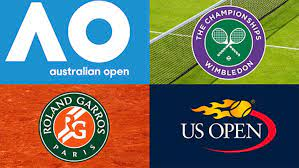

### Introduction

Tennis is very popular sport which is enjoyed and worshiped by fans from all over the
world. There are 4 major tournaments known as the grand slam tournaments namely
the Wimbledon, Australian Open, US Open and French Open. It is usually played by players on three different 
types of surfaces (Clay, Hard,Grass). Tennis is an extremely unpredictable sport where each player has a unique
style and technique which makes the game even more interesting and challenging to predict the winner.

Today, machine learning is used in many sports such as soccer, cricket, baseball, tennis etc.  As we know data is everywhere and tennis is defined by data, and machine learning techniques are already making waves in the field of tennis not only for professional players but also for coaches, fans and potential bidders.The statistical analysis has helped to remodel the game of tennis by diving deep in to the insights of the game and predicting the results with great accuracy. This has not just increased the efficiency of the betting markets
but also helped players and coaches to get better understanding about the game.

### Problem Statement 

The objective of this project is to analyze last 20 years of data and answer the following questions:

1. Find the top 10 players over the years across all grand slam tournaments based on their average rankings and which country do they hail from?
2. Find the number of right or left hand players in the dataset
3. Find the longest match ever played in the 20 years across the four grand slams?
4. Number of aces, double faults, break points faced and saved across tournaments in last 20 years 
5. Correlation between various variables and winning
6. Trajectory of best player over the years, which is Roger Federer

In addition to this analysis, the project is aimed to develop predictive models and understand what are the key factors that impact the winning or losing of tennis player based on their past performance. The following classfication algorithms will be used to develop the models:
1. Logistic Regression
2. KNN
3. Support Vector Classifier
4. Naive Bayes
5. Decision Tree Classifier
6. Random Forest Classifier

### Dataset Description

For the purpose of the project, we consider three datasets:
1. <b>Match.csv</b>- It contains all the match level data. For eg:round, tournament, year of tournament etc. 
2. <b>Player.csv</b>- It contains all the details pertaining to each player. For eg: Birthday, playing hand, country etc. 
3. <b>Stats.csv-</b> It has all the data from all the matches played by each player. For eg: aces, break points won/ saved, rank, points etc. 

Datasets have data from 2000 Aus Open - 2019 US Open for only ATP


### Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [3]:
conda install -c conda-forge cufflinks-py

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cufflinks as cf

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

### Importing Dataset

Here, we have three files in the dataset namely: Match.csv, Player.csv and Stats.csv. Since we only want to focus on 
predicting the match winner based on the statistics from the previou matches we will mostly use the Stats.csv file for 
the purpose of modeling.

In [5]:
match= pd.read_csv('Match.csv')
player= pd.read_csv('Player.csv')
stats= pd.read_csv('Stats.csv')

In [6]:
match.head()

,match_id,round,date,avg_minutes_game,avg_seconds_point,avg_minutes_set,tournament,year,match_minutes
0,m_2019_A_0,1st Round,2019-01-14,4.81,46.8,43.3,Australian Open,2019,173.0
1,m_2019_A_1,1st Round,2019-01-14,3.95,35.7,40.5,Australian Open,2019,162.0
2,m_2019_A_2,1st Round,2019-01-14,4.86,42.3,43.8,Australian Open,2019,175.0
3,m_2019_A_3,1st Round,2019-01-14,4.43,43.3,41.0,Australian Open,2019,164.0
4,m_2019_A_4,1st Round,2019-01-14,4.37,39.7,43.7,Australian Open,2019,131.0


In [7]:
player.head()

,player_id,name,hand,country,birthday
0,atp_100001,Gardnar Mulloy,R,USA,1913-11-22
1,atp_100003,Frank Sedgman,R,AUS,1927-10-02
2,atp_100004,Giuseppe Merlo,R,ITA,1927-10-11
3,atp_100005,Richard Pancho Gonzales,R,USA,1928-05-09
4,atp_100006,Grant Golden,R,USA,1929-08-21


In [8]:
stats.head()

,match_id,player_id,pts,rank,winner,sets,1,2,3,4,...,service_pts,return_pts,aces,bp_saved,bp_faced,first_serve_rtn_won,second_serve_rtn_won,first_serve_in,dbl_faults,first_serve_per
0,m_2019_A_0,atp_104731,4810.0,6.0,True,3.0,6.0,5.0,6.0,6.0,...,73.0,51.0,14.0,5.0,7.0,29.0,22.0,71.0,5.0,0.645455
1,m_2019_A_1,atp_105932,1820.0,20.0,True,3.0,6.0,4.0,7.0,6.0,...,92.0,50.0,11.0,10.0,15.0,17.0,33.0,90.0,9.0,0.620690
2,m_2019_A_2,atp_105430,585.0,98.0,True,3.0,3.0,6.0,6.0,6.0,...,73.0,59.0,10.0,8.0,13.0,27.0,32.0,90.0,1.0,0.720000
3,m_2019_A_3,atp_105882,401.0,137.0,True,3.0,6.0,6.0,6.0,6.0,...,82.0,45.0,23.0,5.0,6.0,16.0,29.0,63.0,3.0,0.543103
4,m_2019_A_4,atp_104269,1410.0,28.0,True,3.0,7.0,6.0,6.0,NaN,...,63.0,47.0,21.0,1.0,2.0,29.0,18.0,58.0,6.0,0.666667


In [9]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10160 entries, 0 to 10159
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match_id           10160 non-null  object 
 1   round              10160 non-null  object 
 2   date               10160 non-null  object 
 3   avg_minutes_game   10114 non-null  float64
 4   avg_seconds_point  10115 non-null  float64
 5   avg_minutes_set    10078 non-null  float64
 6   tournament         10160 non-null  object 
 7   year               10160 non-null  int64  
 8   match_minutes      10117 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 714.5+ KB


In [10]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53666 entries, 0 to 53665
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   player_id  53666 non-null  object
 1   name       53666 non-null  object
 2   hand       48022 non-null  object
 3   country    53666 non-null  object
 4   birthday   43017 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [11]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20240 entries, 0 to 20239
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              20240 non-null  object 
 1   player_id             20240 non-null  object 
 2   pts                   14398 non-null  float64
 3   rank                  20230 non-null  float64
 4   winner                20240 non-null  bool   
 5   sets                  20236 non-null  float64
 6   1                     20236 non-null  float64
 7   2                     20107 non-null  float64
 8   3                     19818 non-null  float64
 9   4                     9898 non-null   float64
 10  5                     3724 non-null   float64
 11  avg_odds              9852 non-null   float64
 12  max_odds              9852 non-null   float64
 13  total_pts             20234 non-null  float64
 14  service_pts           20234 non-null  float64
 15  return_pts         

<AxesSubplot:>

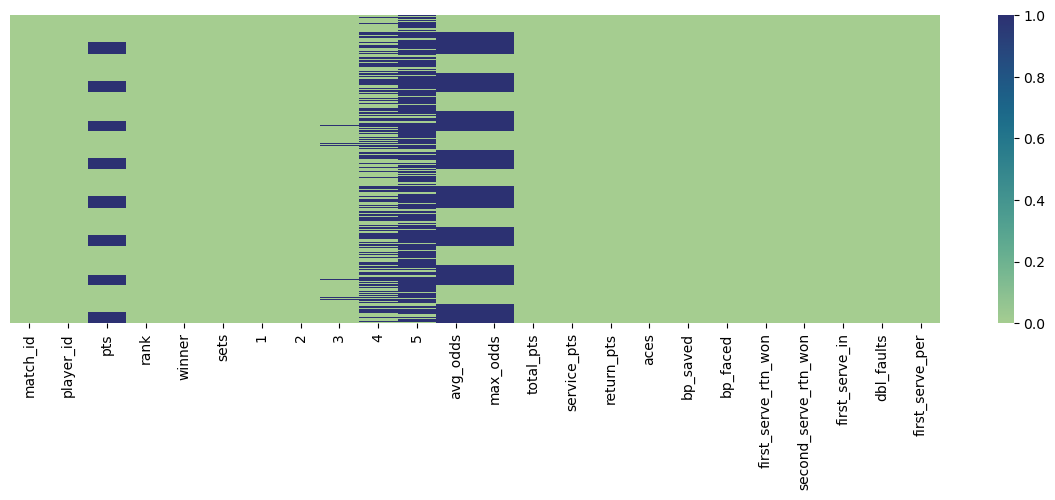

In [12]:
#to check for missing values in the dataset 
plt.figure(figsize=(15,4))
sns.heatmap(data=stats.isnull(),yticklabels=False, cmap='crest')

#### Merging the three datasets together

In [13]:
#merging datasets 
#player datasets = 53k entries 
#stats datset = 20k entries
#match datset = 10k entries 
#we will only consider those who data is in stats and may or may not be in player 

In [14]:
merge_match_stats = pd.merge(match,stats, how='inner',on='match_id')

In [15]:
#merge_match_stats.groupby('match_id').mean()

In [16]:
overall_merge= pd.merge(merge_match_stats,player,how='inner', on='player_id')

In [17]:
overall_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20240 entries, 0 to 20239
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              20240 non-null  object 
 1   round                 20240 non-null  object 
 2   date                  20240 non-null  object 
 3   avg_minutes_game      20228 non-null  float64
 4   avg_seconds_point     20230 non-null  float64
 5   avg_minutes_set       20156 non-null  float64
 6   tournament            20240 non-null  object 
 7   year                  20240 non-null  int64  
 8   match_minutes         20234 non-null  float64
 9   player_id             20240 non-null  object 
 10  pts                   14398 non-null  float64
 11  rank                  20230 non-null  float64
 12  winner                20240 non-null  bool   
 13  sets                  20236 non-null  float64
 14  1                     20236 non-null  float64
 15  2                  

In [18]:
overall_merge.nunique()

match_id                10120
round                       7
date                      867
avg_minutes_game          367
avg_seconds_point         294
avg_minutes_set           364
tournament                  4
year                       20
match_minutes             305
player_id                 780
pts                      1824
rank                      489
winner                      2
sets                        4
1                           8
2                           8
3                           8
4                           8
5                          27
avg_odds                 1344
max_odds                  979
total_pts                 240
service_pts               173
return_pts                101
aces                       63
bp_saved                   26
bp_faced                   34
first_serve_rtn_won        64
second_serve_rtn_won       61
first_serve_in            172
dbl_faults                 25
first_serve_per          3372
name                      780
hand      

<AxesSubplot:>

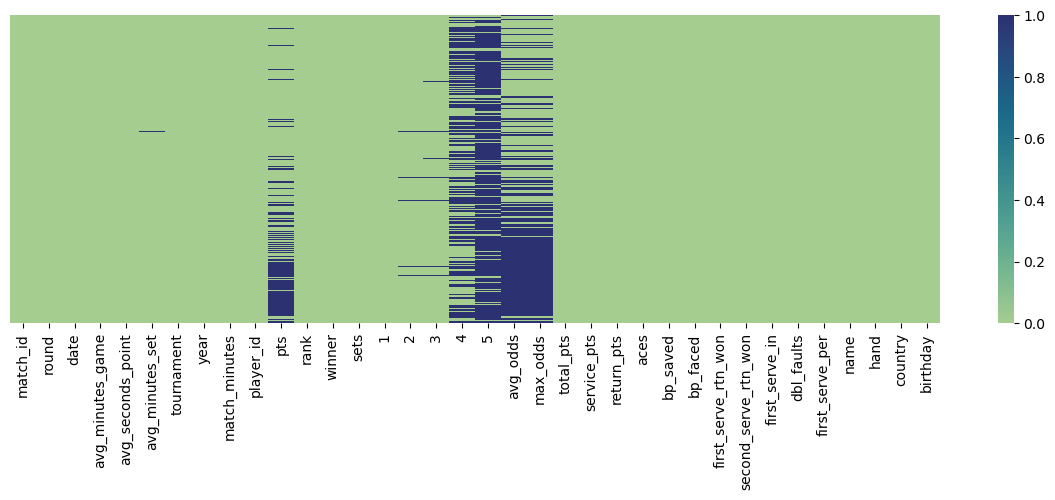

In [19]:
#to check for missing values in the dataset 
plt.figure(figsize=(15,4))
sns.heatmap(data=overall_merge.isnull(),yticklabels=False, cmap='crest')

The are a lot of missing data points in columns 4 and 5 as well as in the avg odds and max odds columns. We can drop these for the purpose of our analysis.  

However, the points(pts) column can be treated with Imputer function to fill in the missing values. 

In [20]:
#Imputing missing values 
from sklearn.impute import SimpleImputer

In [21]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [22]:
imputer.fit(overall_merge.iloc[:,10].values.reshape(-1,1))
overall_merge.iloc[:,10]  = imputer.transform(overall_merge.iloc[:,10].values.reshape(-1,1))


<AxesSubplot:>

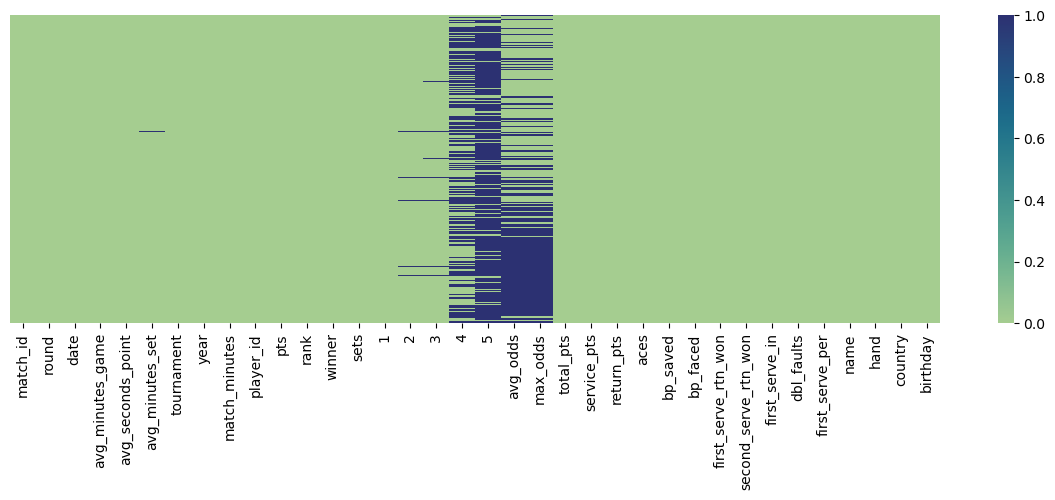

In [23]:
#to check for missing values in the dataset 
plt.figure(figsize=(15,4))
sns.heatmap(data=overall_merge.isnull(),yticklabels=False, cmap='crest')

Selecting columns relevant for our analysis and dropping the following:
1. avg_minutes_game     
2. avg_seconds_point     
3. avg_minutes_set
4. sets
5. 1
6. 2
7. 3
8. 4
9. 5
10. avg_odds (most data missing)
11. max_odds (most data missing)

In [24]:
#only considering the relevant variables and dropping the remaining columns
overall_merge=overall_merge.iloc[:,[0,1,6,7,8,9,10,11,12,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]]

In [25]:
overall_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20240 entries, 0 to 20239
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              20240 non-null  object 
 1   round                 20240 non-null  object 
 2   tournament            20240 non-null  object 
 3   year                  20240 non-null  int64  
 4   match_minutes         20234 non-null  float64
 5   player_id             20240 non-null  object 
 6   pts                   20240 non-null  float64
 7   rank                  20230 non-null  float64
 8   winner                20240 non-null  bool   
 9   total_pts             20234 non-null  float64
 10  service_pts           20234 non-null  float64
 11  return_pts            20234 non-null  float64
 12  aces                  20234 non-null  float64
 13  bp_saved              20234 non-null  float64
 14  bp_faced              20234 non-null  float64
 15  first_serve_rtn_won

In [26]:
#Re-arranging the columns
overall_merge= overall_merge.iloc[:,[0,5,20,21,22,23,7,1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19,8]]

In [27]:
overall_merge

,match_id,player_id,name,hand,country,birthday,rank,round,tournament,year,...,return_pts,aces,bp_saved,bp_faced,first_serve_rtn_won,second_serve_rtn_won,first_serve_in,dbl_faults,first_serve_per,winner
0,m_2019_A_0,atp_104731,Kevin Anderson,R,RSA,1986-05-18,6.0,1st Round,Australian Open,2019,...,51.0,14.0,5.0,7.0,29.0,22.0,71.0,5.0,0.645455,True
1,m_2019_A_70,atp_104731,Kevin Anderson,R,RSA,1986-05-18,6.0,2nd Round,Australian Open,2019,...,31.0,13.0,10.0,14.0,16.0,15.0,87.0,4.0,0.649254,False
2,m_2018_A_2,atp_104731,Kevin Anderson,R,RSA,1986-05-18,12.0,1st Round,Australian Open,2018,...,55.0,35.0,7.0,11.0,24.0,31.0,93.0,2.0,0.669065,False
3,m_2016_A_40,atp_104731,Kevin Anderson,R,RSA,1986-05-18,12.0,1st Round,Australian Open,2016,...,26.0,14.0,6.0,9.0,12.0,14.0,82.0,11.0,0.607407,False
4,m_2015_A_2,atp_104731,Kevin Anderson,R,RSA,1986-05-18,15.0,1st Round,Australian Open,2015,...,64.0,32.0,10.0,14.0,28.0,36.0,112.0,9.0,0.678788,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20235,m_2001_W_26,atp_102263,Yong Il Yoon,R,KOR,1973-09-23,160.0,1st Round,Wimbledon,2001,...,20.0,5.0,4.0,9.0,6.0,14.0,45.0,5.0,0.511364,False
20236,m_2000_W_1,atp_102572,Igor Gaudi,R,ITA,1975-04-10,218.0,1st Round,Wimbledon,2000,...,17.0,0.0,6.0,12.0,6.0,11.0,38.0,11.0,0.550725,False
20237,m_2000_W_20,atp_102198,Paul Kilderry,R,AUS,1973-04-11,297.0,1st Round,Wimbledon,2000,...,32.0,4.0,4.0,9.0,20.0,12.0,48.0,6.0,0.578313,False
20238,m_2000_W_24,atp_102405,Mahesh Bhupathi,R,IND,1974-06-07,1049.0,1st Round,Wimbledon,2000,...,36.0,12.0,4.0,8.0,17.0,19.0,72.0,11.0,0.590164,False


Now some analysis questions to answer


#### 1. Find the top 10 players over the years across all grand slam tournaments based on their average rankings and which country do they hail from?

In [28]:
top_10 =overall_merge.set_index(['name','country']).groupby(by=['name', 'country']).mean().sort_values('rank').head(10)
top_10

,,rank,year,match_minutes,pts,total_pts,service_pts,return_pts,aces,bp_saved,bp_faced,first_serve_rtn_won,second_serve_rtn_won,first_serve_in,dbl_faults,first_serve_per,winner
name,country,,,,,,,,,,,,,,,,
Roger Federer,SUI,4.619855,2009.646489,124.978208,6457.104831,112.680387,69.150121,43.530266,10.554479,3.617433,5.314770,22.370460,21.159806,62.000000,2.150121,0.634578,0.864407
Rafael Nadal,ESP,4.686084,2011.728155,149.090615,7594.655097,108.608414,64.983819,43.624595,4.462783,4.181230,6.135922,21.737864,21.886731,64.834951,2.051780,0.682721,0.877023
Andre Agassi,USA,5.028037,2002.485981,126.644860,1748.401846,112.738318,67.420561,45.317757,7.392523,4.728972,7.233645,20.579439,24.738318,63.859813,3.121495,0.633059,0.813084
Pete Sampras,USA,7.346154,2000.865385,144.692308,1755.148910,124.211538,82.307692,41.903846,17.673077,4.500000,6.211538,19.153846,22.750000,72.442308,7.000000,0.617976,0.807692
Yevgeny Kafelnikov,RUS,8.037736,2001.150943,138.113208,1755.148910,118.415094,70.679245,47.735849,7.943396,6.471698,10.415094,20.792453,26.943396,61.641509,6.377358,0.547887,0.698113
Novak Djokovic,SRB,8.555901,2012.444099,140.649068,9081.797806,111.950311,67.183230,44.767081,7.037267,4.080745,6.248447,21.757764,23.009317,65.170807,2.698758,0.663715,0.866460
Andy Roddick,USA,10.886364,2006.306818,132.272727,2479.866284,111.301136,72.284091,39.017045,15.454545,3.681818,5.301136,18.340909,20.676136,66.857955,2.380682,0.663078,0.744318
Patrick Rafter,AUS,14.535714,2000.642857,140.678571,1755.148910,119.285714,76.642857,42.642857,11.857143,4.071429,5.821429,19.000000,23.642857,70.821429,4.285714,0.656537,0.750000
David Ferrer,ESP,14.562500,2010.711538,144.831731,3455.783549,113.697115,66.745192,46.951923,4.307692,5.125000,8.649038,22.475962,24.475962,67.072115,3.475962,0.636937,0.697115


Therefore, if we look across the data from 2000 to 2019, we see that on an average, the top 10 ranked players:
Roger Federer, Rafael Nadal, Andre Agassi, Pete Sampras, Yevgeny Kafelnikov, Yevgeny Kafelnikov, Novak Djokovic,
Andy Roddick,Patrick Rafter, David Ferrer and Andy Murray

#### 2. Find the number of right or left hand players in the dataset

In [29]:
overall_merge['hand'].unique()

array(['R', 'L', 'U'], dtype=object)

There are 3 categories of hand information- right-handed, left-handed and unknown

Text(0.5, 1.0, 'Number of players - Split across which hand they play with')

<Figure size 1000x400 with 0 Axes>

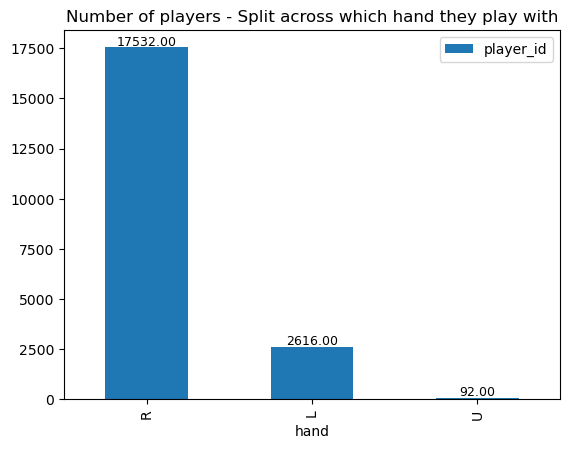

In [30]:
plt.figure(figsize=(10, 4))

hand_info= overall_merge[['player_id','hand']].groupby('hand').count().sort_values('player_id', ascending=False).plot(kind='bar')

for bar in hand_info.patches:
    
    hand_info.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0,4),
                   textcoords='offset points')

plt.title('Number of players - Split across which hand they play with')
    

#### 3. Find the longest match ever played in the 20 years across the four grand slams?

In [31]:
long_match=overall_merge[['match_id','match_minutes','tournament']].sort_values('match_minutes', ascending=False)
long_match.groupby('tournament').max()

,match_id,match_minutes
tournament,,
Australian Open,m_2019_A_99,353.0
French Open,m_2019_F_99,393.0
US Open,m_2019_U_99,309.0
Wimbledon,m_2019_W_99,665.0


Thus, the longest matches across all four grand slams were played in 2019, with Wimbeldon witnessing a 
match go as long as 665 minutes 

#### 4. Number of aces, double faults, break points faced and saved across tournaments in last 20 years 

In [32]:
year_list =overall_merge['year'].unique().tolist()

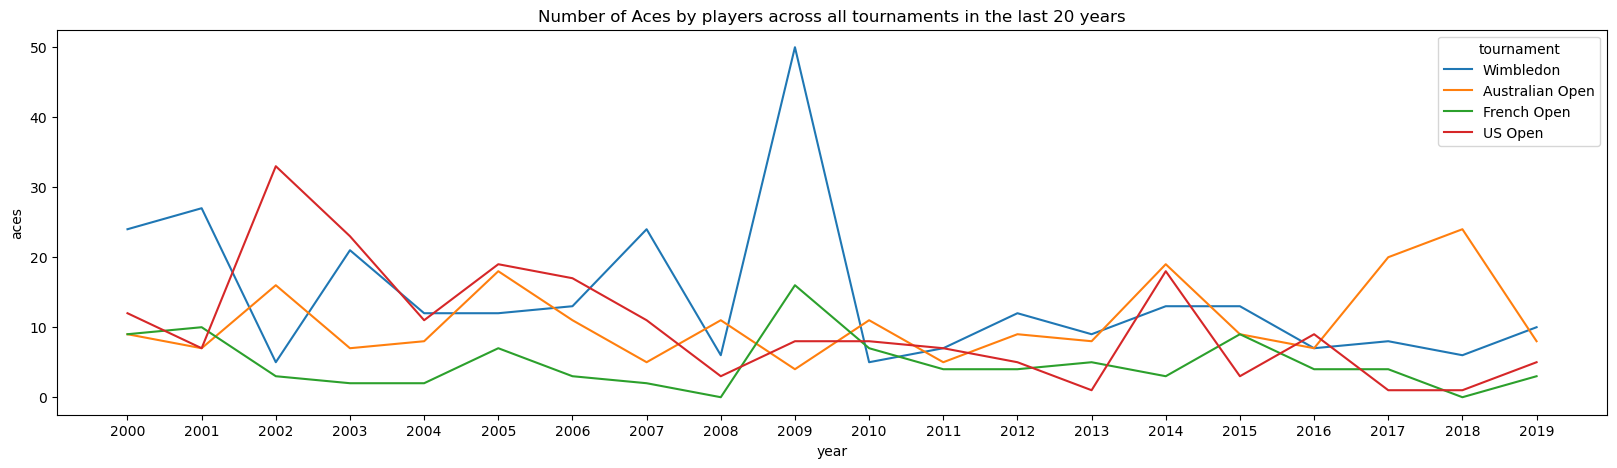

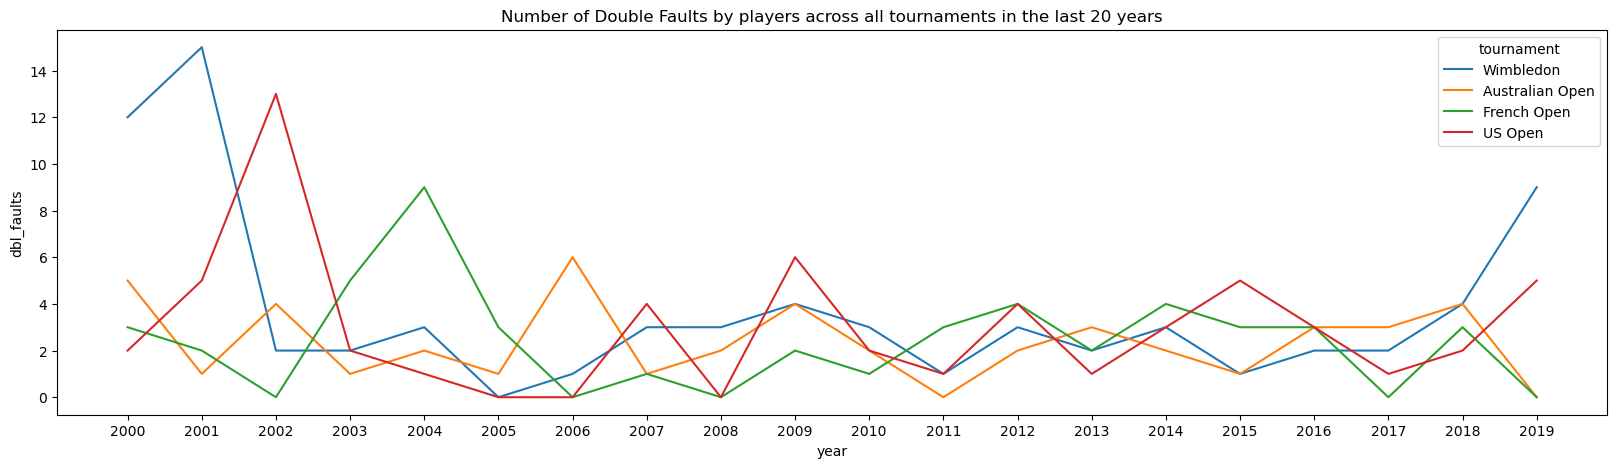

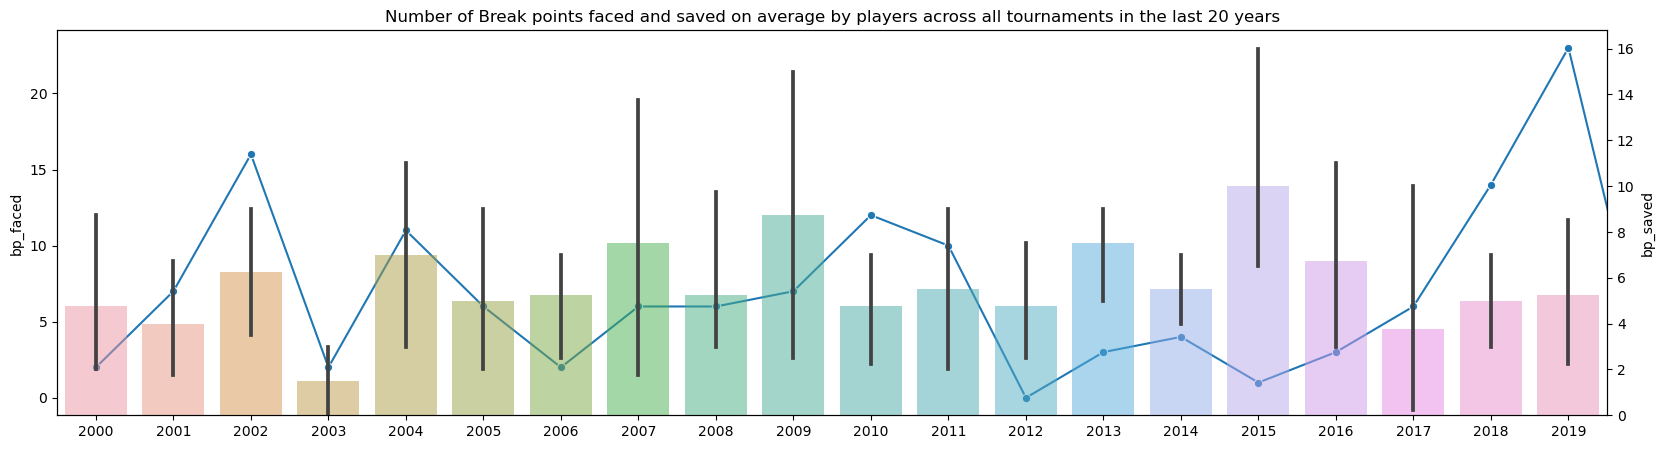

In [33]:
#Aces
aces= overall_merge.set_index(['year','tournament','name']).sort_values('year')
aces= aces[(aces['round']=='The Final')& (aces['winner']==True)]
aces.reset_index()

plt.figure(figsize=(20,5))
sns.lineplot(x='year', y='aces', data= aces, hue='tournament')
plt.title('Number of Aces by players across all tournaments in the last 20 years')
plt.xticks(year_list, labels=None, rotation=0)
plt.show()

#Double faults
df= overall_merge.set_index(['year','tournament','name']).sort_values('year')
df= df[(df['round']=='The Final')& (df['winner']==True)]
df.reset_index()

plt.figure(figsize=(20,5))
sns.lineplot(x='year', y='dbl_faults', data= aces, hue='tournament')
plt.title('Number of Double Faults by players across all tournaments in the last 20 years')
plt.xticks(year_list, labels=None, rotation=0)
plt.show()

#Break Points Faced and saved on average across the tournaments
bpf= overall_merge.set_index(['year','tournament','name']).sort_values('year')
bpf= bpf[(bpf['round']=='The Final')& (bpf['winner']==True)]
bpf.reset_index(inplace=True)

ax1 = sns.set_style(style=None, rc=None)
fig, ax1 = plt.subplots(figsize=(20,5))
sns.lineplot(data = bpf['bp_faced'] ,marker='o', ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data = bpf, x='year', y='bp_saved', alpha=0.5, ax=ax2)
plt.title('Number of Break points faced and saved on average by players across all tournaments in the last 20 years')
plt.show()

From here, we can clearly show that Wimbledon has the highest number of aces across the years witha peak in 2009.

#### 5. To see correlations between different variables with winning. 

<AxesSubplot:>

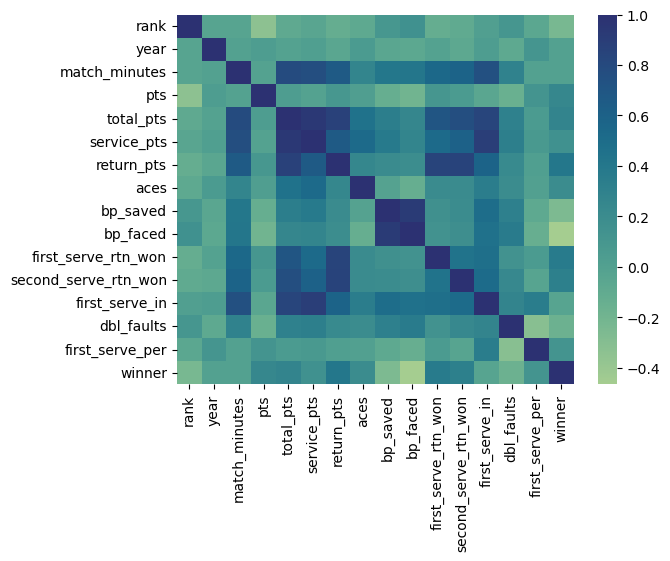

In [34]:
#overall
overall_corr= overall_merge.corr()
sns.heatmap(overall_corr, cmap='crest')

<AxesSubplot:xlabel='year', ylabel='winner'>

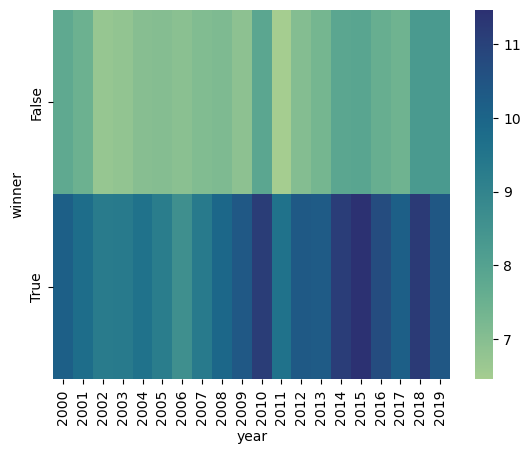

In [35]:
#Correlation between aces and winning
pivot_aces= overall_merge.pivot_table(index='winner', columns='year', values='aces')
sns.heatmap(pivot_aces,  cmap='crest')

Strong correlation exists between winning and aces

<AxesSubplot:xlabel='year', ylabel='winner'>

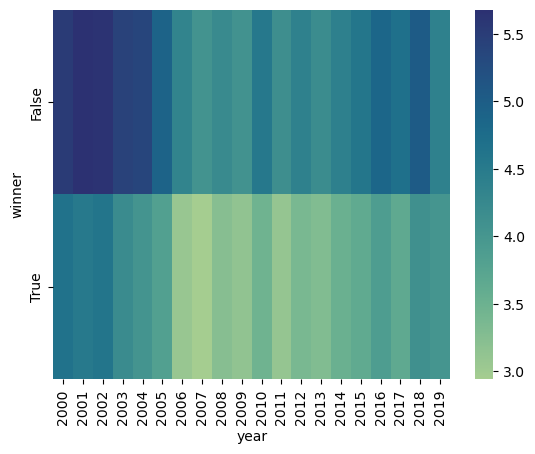

In [36]:
#Correlation between double faults and winning
pivot_dbf= overall_merge.pivot_table(index='winner', columns='year', values='dbl_faults')
sns.heatmap(pivot_dbf,  cmap='crest')

#### 6. Trajectory of best player over the years, which is Roger Federer
Here, we showcase his trajectory through the number of matches he won over the years, the escalation in world ranking
in all 4 grand slam tournaments

Some basic statistics on him 

In [37]:
overall_merge[(overall_merge['name']=='Roger Federer')].groupby(['year','tournament']).count()

match_id  player_id  name  hand  country  birthday  \
year tournament                                                            
2000 Australian Open         3          3     3     3        3         3   
     French Open             4          4     4     4        4         4   
     US Open                 3          3     3     3        3         3   
     Wimbledon               1          1     1     1        1         1   
2001 Australian Open         3          3     3     3        3         3   
...                        ...        ...   ...   ...      ...       ...   
2018 Wimbledon               5          5     5     5        5         5   
2019 Australian Open         4          4     4     4        4         4   
     French Open             6          6     6     6        6         6   
     US Open                 5          5     5     5        5         5   
     Wimbledon               7          7     7     7        7         7   

                      rank  round  match_minutes  pts  ...  return_pts  aces  \
year tournament                                        ...                     
2000 Australian Open     3      3              3    3  ...           3     3   
     French Open         4      4              4    4  ...           4     4   
     US Open             3      3              3    3  ...           3     3   
     Wimbledon           1      1              1    1  ...           1     1   
2001 Australian Open     3      3              3    3  ...           3     3   
...                    ...    ...            ...  ...  ...         ...   ...   
2018 Wimbledon           5      5              5    5  ...           5     5   
2019 Australian Open     4      4              4    4  ...           4     4   
     French Open         6      6              6    6  ...           6     6   
     US Open             5      5              5    5  ...           5     5   
     Wimbledon           7      7              7    7  ...           7     7   

                      bp_saved  bp_faced  first_serve_rtn_won  \
year tournament                                                 
2000 Australian Open         3         3                    3   
     French Open             4         4                    4   
     US Open                 3         3                    3   
     Wimbledon               1         1                    1   
2001 Australian Open         3         3                    3   
...                        ...       ...                  ...   
2018 Wimbledon               5         5                    5   
2019 Australian Open         4         4                    4   
     French Open             6         6                    6   
     US Open                 5         5                    5   
     Wimbledon               7         7                    7   

                      second_serve_rtn_won  first_serve_in  dbl_faults  \
year tournament                                                          
2000 Australian Open                     3               3           3   
     French Open                         4               4           4   
     US Open                             3               3           3   
     Wimbledon                           1               1           1   
2001 Australian Open                     3               3           3   
...                                    ...             ...         ...   
2018 Wimbledon                           5               5           5   
2019 Australian Open                     4               4           4   
     French Open                         6               6           6   
     US Open                             5               5           5   
     Wimbledon                           7               7           7   

                      first_serve_per  winner  
year tournament                                
2000 Australian Open                3       3  
     French Open                    4  

Number of matches played= 413
Country= Switzerland
Age=41
Playing hand= Right
Number of Grandslam tournaments played= 76

In [38]:
rg_win= overall_merge[(overall_merge['name']=='Roger Federer') & (overall_merge['winner']== True)].sort_values('year')
rg_win.groupby(['year']).match_id.count().iplot(title='Matches won by Roger Federer over the last 20 years',
            xTitle='Years', yTitle='Matches Won')

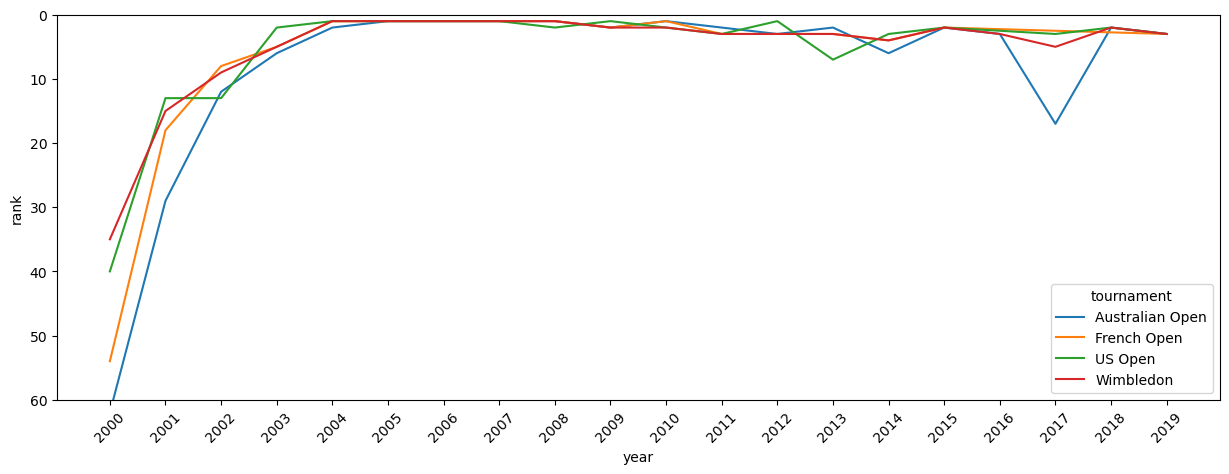

In [39]:
plt.figure(figsize=(15,5))
rank= overall_merge[(overall_merge['name']=='Roger Federer')].sort_values('year').groupby(['year','tournament']).mean()
rank = rank.reset_index()
sns.lineplot(x='year', y='rank', data=rank, hue='tournament')

year_list= list(overall_merge['year'].unique())
plt.xticks(year_list, labels=None, rotation=45)
plt.ylim(60,0)
plt.show()



### MODELING 

### Encoding categorical data

Before we built a supervised classification model using the merged data, we need to encode the categorical data. Here, our independent variables that are categorical are: Name, Hand, Country, Round and Tournament. Fo the purpose of our modeling, we will only encode Hand and tournmament since the other categories will not be to helpful in our modeling. We will also encode the dependent variable - Winner as well.

In [40]:
overall_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20240 entries, 0 to 20239
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              20240 non-null  object 
 1   player_id             20240 non-null  object 
 2   name                  20240 non-null  object 
 3   hand                  20240 non-null  object 
 4   country               20240 non-null  object 
 5   birthday              20240 non-null  object 
 6   rank                  20230 non-null  float64
 7   round                 20240 non-null  object 
 8   tournament            20240 non-null  object 
 9   year                  20240 non-null  int64  
 10  match_minutes         20234 non-null  float64
 11  pts                   20240 non-null  float64
 12  total_pts             20234 non-null  float64
 13  service_pts           20234 non-null  float64
 14  return_pts            20234 non-null  float64
 15  aces               

In [41]:
overall_merge=overall_merge.iloc[:,[3,6,8,9,10,11,12,13,14,15,16, 17,18,19,20,21,22,23]]

In [42]:
overall_merge

,hand,rank,tournament,year,match_minutes,pts,total_pts,service_pts,return_pts,aces,bp_saved,bp_faced,first_serve_rtn_won,second_serve_rtn_won,first_serve_in,dbl_faults,first_serve_per,winner
0,R,6.0,Australian Open,2019,173.0,4810.00000,124.0,73.0,51.0,14.0,5.0,7.0,29.0,22.0,71.0,5.0,0.645455,True
1,R,6.0,Australian Open,2019,179.0,4810.00000,118.0,87.0,31.0,13.0,10.0,14.0,16.0,15.0,87.0,4.0,0.649254,False
2,R,12.0,Australian Open,2018,239.0,2610.00000,154.0,99.0,55.0,35.0,7.0,11.0,24.0,31.0,93.0,2.0,0.669065,False
3,R,12.0,Australian Open,2016,169.0,2475.00000,111.0,85.0,26.0,14.0,6.0,9.0,12.0,14.0,82.0,11.0,0.607407,False
4,R,15.0,Australian Open,2015,215.0,2125.00000,171.0,107.0,64.0,32.0,10.0,14.0,28.0,36.0,112.0,9.0,0.678788,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20235,R,160.0,Wimbledon,2001,81.0,1755.14891,72.0,52.0,20.0,5.0,4.0,9.0,6.0,14.0,45.0,5.0,0.511364,False
20236,R,218.0,Wimbledon,2000,68.0,1755.14891,51.0,34.0,17.0,0.0,6.0,12.0,6.0,11.0,38.0,11.0,0.550725,False
20237,R,297.0,Wimbledon,2000,104.0,1755.14891,78.0,46.0,32.0,4.0,4.0,9.0,20.0,12.0,48.0,6.0,0.578313,False
20238,R,1049.0,Wimbledon,2000,130.0,1755.14891,114.0,78.0,36.0,12.0,4.0,8.0,17.0,19.0,72.0,11.0,0.590164,False


In [43]:
#Defining our independent and dependent variables
X= overall_merge.iloc[:,:-1].values
y=overall_merge.iloc[:,-1].values

In [44]:
#Encoding independent variables - hand and tournament
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
col_trans= ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0,2])],remainder='passthrough')
X= np.array(col_trans.fit_transform(X))

In [45]:
#Encoding dependent variable- winner
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y= le.fit_transform(y)

### Splitting the data into training set and test set 

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Feature Scaling- To ensure all out models perform better 

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc= StandardScaler()

In [50]:
X_train[:,11:]= sc.fit_transform(X_train[:,11:])
X_test[:,11:]= sc.transform(X_test[:,11:])

In [51]:
#Imputing values in X_train and X_test to remove null values 
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train  = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [52]:
np.any(np.isnan(X_train))

False

In [53]:
np.all(np.isfinite(X_train))

True

In [54]:
np.all(np.isnan(X_train))

False

In [55]:
np.all(np.isfinite(X_train))

True

In [56]:
np.any(np.isnan(y_train))

False

In [57]:
print(np.isnan(X_train))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [58]:
np.all(np.isfinite(y_train))

True

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
log_class= LogisticRegression()


In [61]:
log_class.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

#### Predicting the test result

In [62]:
y_pred_logr = log_class.predict(X_test)

In [63]:
y_pred_logr

array([1, 1, 0, ..., 0, 0, 1])

#### Evaluating the test result

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cr_log= classification_report(y_pred_logr,y_test)
cm_log= confusion_matrix(y_pred_logr,y_test)
print(cr_log)
print(cm_log)
accuracy_score(y_pred_logr,y_test)


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2992
           1       0.87      0.87      0.87      3080

    accuracy                           0.87      6072
   macro avg       0.87      0.87      0.87      6072
weighted avg       0.87      0.87      0.87      6072

[[2584  408]
 [ 406 2674]]


0.8659420289855072

So, the logistic regression function is 86% accurate in predicting the test results 

## K Nearest Neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn= KNeighborsClassifier(n_neighbors=10)

In [67]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

#### Predicting the test result

In [68]:
y_pred_knn = knn.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



#### Evaluating the test result

In [69]:

cr_knn= classification_report(y_pred_knn,y_test)
cm_knn= confusion_matrix(y_pred_knn,y_test)
print(cr_knn)
print(cm_knn)
accuracy_score(y_pred_knn,y_test)

              precision    recall  f1-score   support

           0       0.74      0.61      0.67      3579
           1       0.55      0.68      0.61      2493

    accuracy                           0.64      6072
   macro avg       0.64      0.65      0.64      6072
weighted avg       0.66      0.64      0.64      6072

[[2198 1381]
 [ 792 1701]]


0.6421277997364954

So, the KNN Classifier algorithm is 64% accurate in predicting the test results 

## Support Vector Machines

In [70]:
from sklearn.svm import SVC

In [71]:
svc= SVC(kernel='linear')

In [72]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

#### Predicting the test result

In [73]:
y_pred_svc = svc.predict(X_test)

#### Evaluating the test result

In [74]:

cr_svc= classification_report(y_pred_svc,y_test)
cm_svc= confusion_matrix(y_pred_svc,y_test)
print(cr_svc)
print(cm_svc)
accuracy_score(y_pred_svc,y_test)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2971
           1       0.91      0.90      0.91      3101

    accuracy                           0.90      6072
   macro avg       0.90      0.90      0.90      6072
weighted avg       0.90      0.90      0.90      6072

[[2690  281]
 [ 300 2801]]


0.9043148880105402

So, the Support Vector Classifier algorithm is 90% accurate in predicting the test results 

## Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

#### Predicting the test result

In [76]:
y_pred_nb = nb.predict(X_test)

#### Evaluating the test result

In [77]:
cr_nb= classification_report(y_pred_nb,y_test)
cm_nb= confusion_matrix(y_pred_nb,y_test)
print(cr_nb)
print(cm_nb)
accuracy_score(y_pred_nb,y_test)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2748
           1       0.85      0.79      0.82      3324

    accuracy                           0.81      6072
   macro avg       0.81      0.81      0.81      6072
weighted avg       0.81      0.81      0.81      6072

[[2292  456]
 [ 698 2626]]


0.8099472990777339

So, the Naive Bayes algorithm is 81% accurate in predicting the test results 

## Decision Trees

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

#### Predicting the test result

In [79]:
y_pred_dtc = dtc.predict(X_test)

#### Evaluating the test result

In [80]:
cr_dtc= classification_report(y_pred_dtc,y_test)
cm_dtc= confusion_matrix(y_pred_dtc,y_test)
print(cr_dtc)
print(cm_dtc)
accuracy_score(y_pred_dtc,y_test)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3036
           1       0.83      0.84      0.84      3036

    accuracy                           0.84      6072
   macro avg       0.84      0.84      0.84      6072
weighted avg       0.84      0.84      0.84      6072

[[2514  522]
 [ 476 2560]]


0.8356389986824769

So, the decision tree algorithm is 83% accurate in predicting the test results 

## Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

#### Predicting the test result

In [82]:
y_pred_rfc = rfc.predict(X_test)

#### Evaluating the test result

In [83]:
cr_rfc= classification_report(y_pred_rfc,y_test)
cm_rfc= confusion_matrix(y_pred_rfc,y_test)
print(cr_rfc)
print(cm_rfc)
accuracy_score(y_pred_rfc,y_test)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2955
           1       0.89      0.88      0.88      3117

    accuracy                           0.88      6072
   macro avg       0.88      0.88      0.88      6072
weighted avg       0.88      0.88      0.88      6072

[[2608  347]
 [ 382 2735]]


0.8799407114624506

So, the random forest algorithm is 80% accurate in predicting the test results 

### Conclusion

Thus, out of all the classification models, the <b>logistic regression </b>algorithm predicts the test results most accurately. 